In [119]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from random import randrange, uniform
from time import time
import glob
import shutil
import itertools
from time import time

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

In [175]:
def show(image, cmap):
    if cmap == 1:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

# Read image RGB

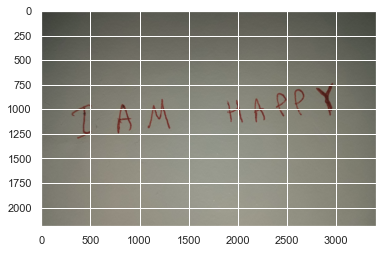

In [127]:
image_color = cv2.imread('ktaba.jpg', cv2.COLOR_BGR2RGB)
plt.imshow(image_color)
plt.show()

# Remove noise

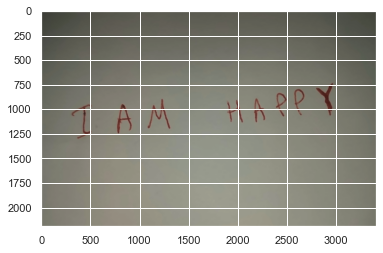

In [158]:
image_denoise = cv2.fastNlMeansDenoisingColored(image_color, None, 25, 25, 7, 25)
plt.imshow(image_denoise)
plt.show()

# Grayscale

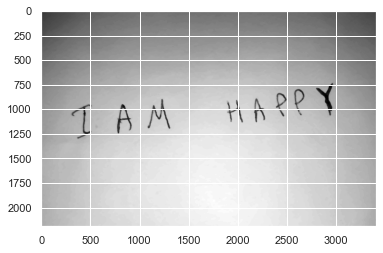

In [159]:
image_gray = cv2.cvtColor(image_denoise, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')
plt.show()

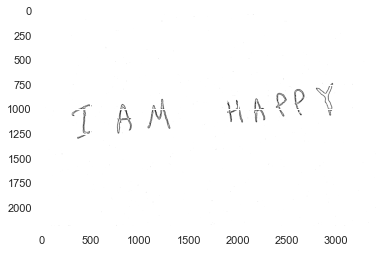

In [160]:
image_binary = cv2.adaptiveThreshold(image_gray, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(image_binary, cmap='gray')
plt.show()

# Thinning

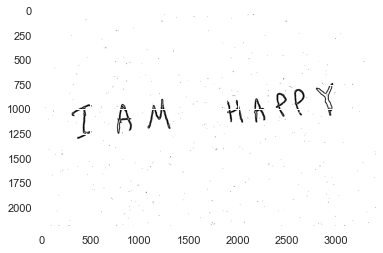

In [161]:
kernel = np.ones((4,4),np.uint8)
image_thin = cv2.erode(image_binary, kernel, iterations = 1)
plt.imshow(image_thin, cmap='gray')
plt.show()

# Character level segmentation

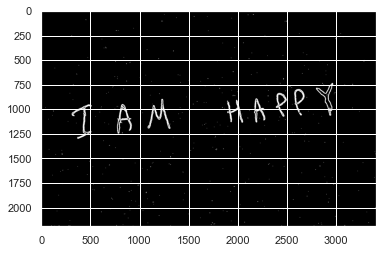

In [180]:
mask = cv2.inRange(image_thin, 0, 0)
show(mask, 'gray')

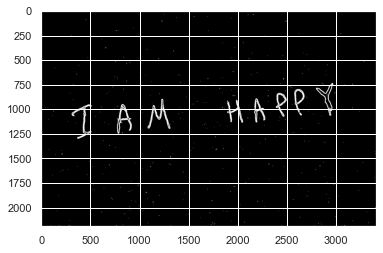

In [177]:
mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
show(mask_color, 1)

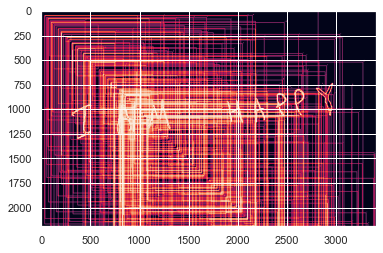

In [182]:
gray = mask

# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray,255, 1, 1, 11, 2)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# apply some dilation and erosion to join the gaps
thresh = cv2.dilate(thresh,None,iterations = 3)
thresh = cv2.erode(thresh,None,iterations = 2)

# Find the contours
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# For each contour, find the bounding rectangle and draw it

i = 0
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    roi = mask[y:y+h, x:x+w]
    cv2.rectangle(mask,(x,x+w),(y,y+h),(255,0,0),2)
    #cv2.imwrite(f"segment{i}", roi)
    
    #i += 1
    #cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)

# Finally show the image
plt.imshow(mask)
plt.show()

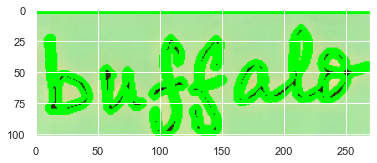

In [327]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for contour in contours:
    cv2.drawContours(img, contours, -1, (0, 255, 0), 3)    
plt.imshow(img)
plt.show()

In [328]:
imag = mask

In [329]:
im = image_denoise

In [330]:
for contour in contours:
    (x,y),radius = cv2.minEnclosingCircle(contour)
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(im,center,radius,(255,0,0),2)

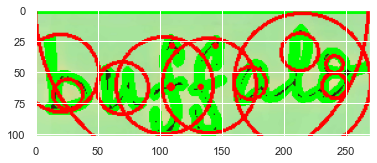

In [331]:
show(im)

In [175]:
contour.shape

(538, 1, 2)

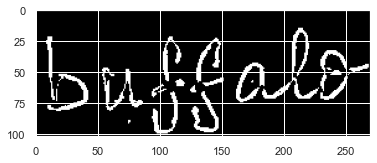

In [200]:
show(mask)

In [222]:
def first_letter(mask):
    height = mask.shape[1]
    width = mask.shape[0]
    columns = []

    
    for i in range(width):
        if np.sum(mask, axis=0)[i] > 255:
            columns.append([i-1]) 
        else:
            pass
            
            
        
columns = first_letter(mask)

In [223]:
columns

In [219]:
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

# Teeseract

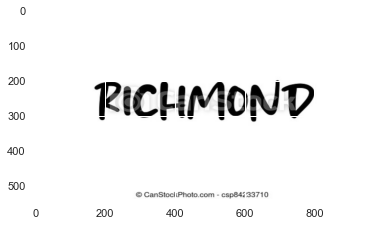

In [61]:
import cv2
import pytesseract
from gtts import gTTS
from mutagen.mp3 import MP3
# font for drawing bounding boxes
font = cv2.FONT_HERSHEY_SIMPLEX

# tesseract software (you have to install it)
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# load the image
img = cv2.imread("img/hand.jpg")
img = cv2.resize(img, (960, 540)) 

# by default, cv2 shows images in BGR format. We want the images in RGB format.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

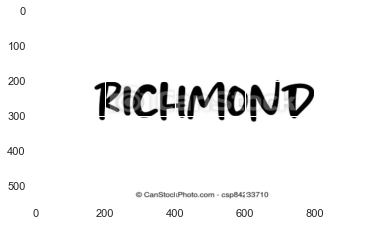

In [62]:
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')
plt.show()

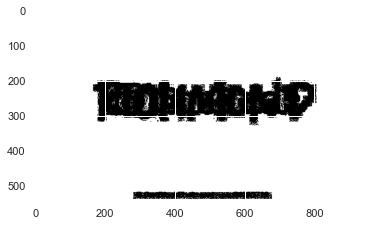

In [64]:
mask = cv2.inRange(image_gray, 255, 255)
show(mask)

In [65]:
# result of prediction:
predictions = pytesseract.image_to_string(image_gray)
print(predictions)

RICHMOND

© CanStockPhoto.com - csp84233710



In [66]:
import easyocr

In [67]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [68]:
result = reader.readtext(image_gray)[0][1]

In [69]:
print(result)

RiCHMOND
